# Timeliness Study

We are interested in knowing the timeliness of the last prefetch issued before a demand request. Timeliness is defined as the number of clock cycles between the issued prefetch and the demand request.

In [3]:
import sys, re
import matplotlib as mpl
import numpy as np
import os
import subprocess
import copy
mpl.rcParams['font.size'] = 14
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import argparse

NROWS=5
NCOLS=5

In [4]:
def get_experiment_traces(experiment, trace_list):
    experiment_trace_files = []
    traces = []
    for trace in trace_list:
        trace = trace[:-1]
        traces.append(trace)
        experiment_trace = '../current_output/'+experiment+'/'+trace+'.txt'
        experiment_trace_files.append(experiment_trace)
    return (experiment_trace_files, traces)

In [5]:
def parse_timeliness(trace):
    time_distr = []
    for line in open(trace, 'r'):
        if (re.match("cacheline:", line)):
            split = re.split(',| ', line.rstrip())
            split = [i.strip() for i in split if i.strip()]
            if (len(split) > 3):
                time_list = list(map(int, split[3:]))
                time_distr.extend(time_list)
                
    return time_distr

In [6]:
def search(regex, pos, trace_files):
    result = []
    for trace_file in trace_files:
        found = False
        for line in open(trace_file, 'r'):
            if not found and re.match(regex, line):
                result.append(float(line.split()[pos]))
                found = True
    return result

In [7]:
def get_average_dram_latency(experiment_trace_files):
    dram_avg_latency = search('LLC AVERAGE MISS LATENCY: ', 4, experiment_trace_files)
    return dram_avg_latency

In [8]:
def graph_time_distr(experiment_trace_files, traces):
    fig = plt.figure(figsize=(30, 30))
    spec = gridspec.GridSpec(nrows = NROWS, ncols = NCOLS, wspace = 0.2, hspace = 0.4)
    axs = []
    
    i = 0
    for r in range(NROWS):
        for c in range(NCOLS):
            ax = fig.add_subplot(spec[r, c])
            ax.set_ylabel('Frequency')
            ax.set_xlabel('time in clock cycles')
            if (i < len(traces)):
                ax.set_title(f'{traces[i]} timeliness distribution')
            axs.append(ax)
            i += 1
            
    dram_avg_latency = get_average_dram_latency(experiment_trace_files)
    i = 0
    for trace in experiment_trace_files:
        time_distr = parse_timeliness(trace)
        bins = 10
        if (i < len(traces) and len(time_distr) > 0):
            bin_arr = np.linspace(min(time_distr), max(time_distr), bins, endpoint=True)
            axs[i].hist(time_distr, bins=bin_arr, rwidth=0.8)
            axs[i].autoscale()
            axs[i].axvline(x = dram_avg_latency[i], color = 'orange', label = 'axvline - full height')
        i += 1

In [9]:
# Harmony with Best Offset Prefetch Interval Use
# get experiment trace files
experiment = 'experiment_tracer_hawkeye_final_dyn_bo_timeliness'
trace_list = open('../sim_list/traces.txt', 'r')

(experiment_trace_files, traces) = get_experiment_traces(experiment, trace_list)

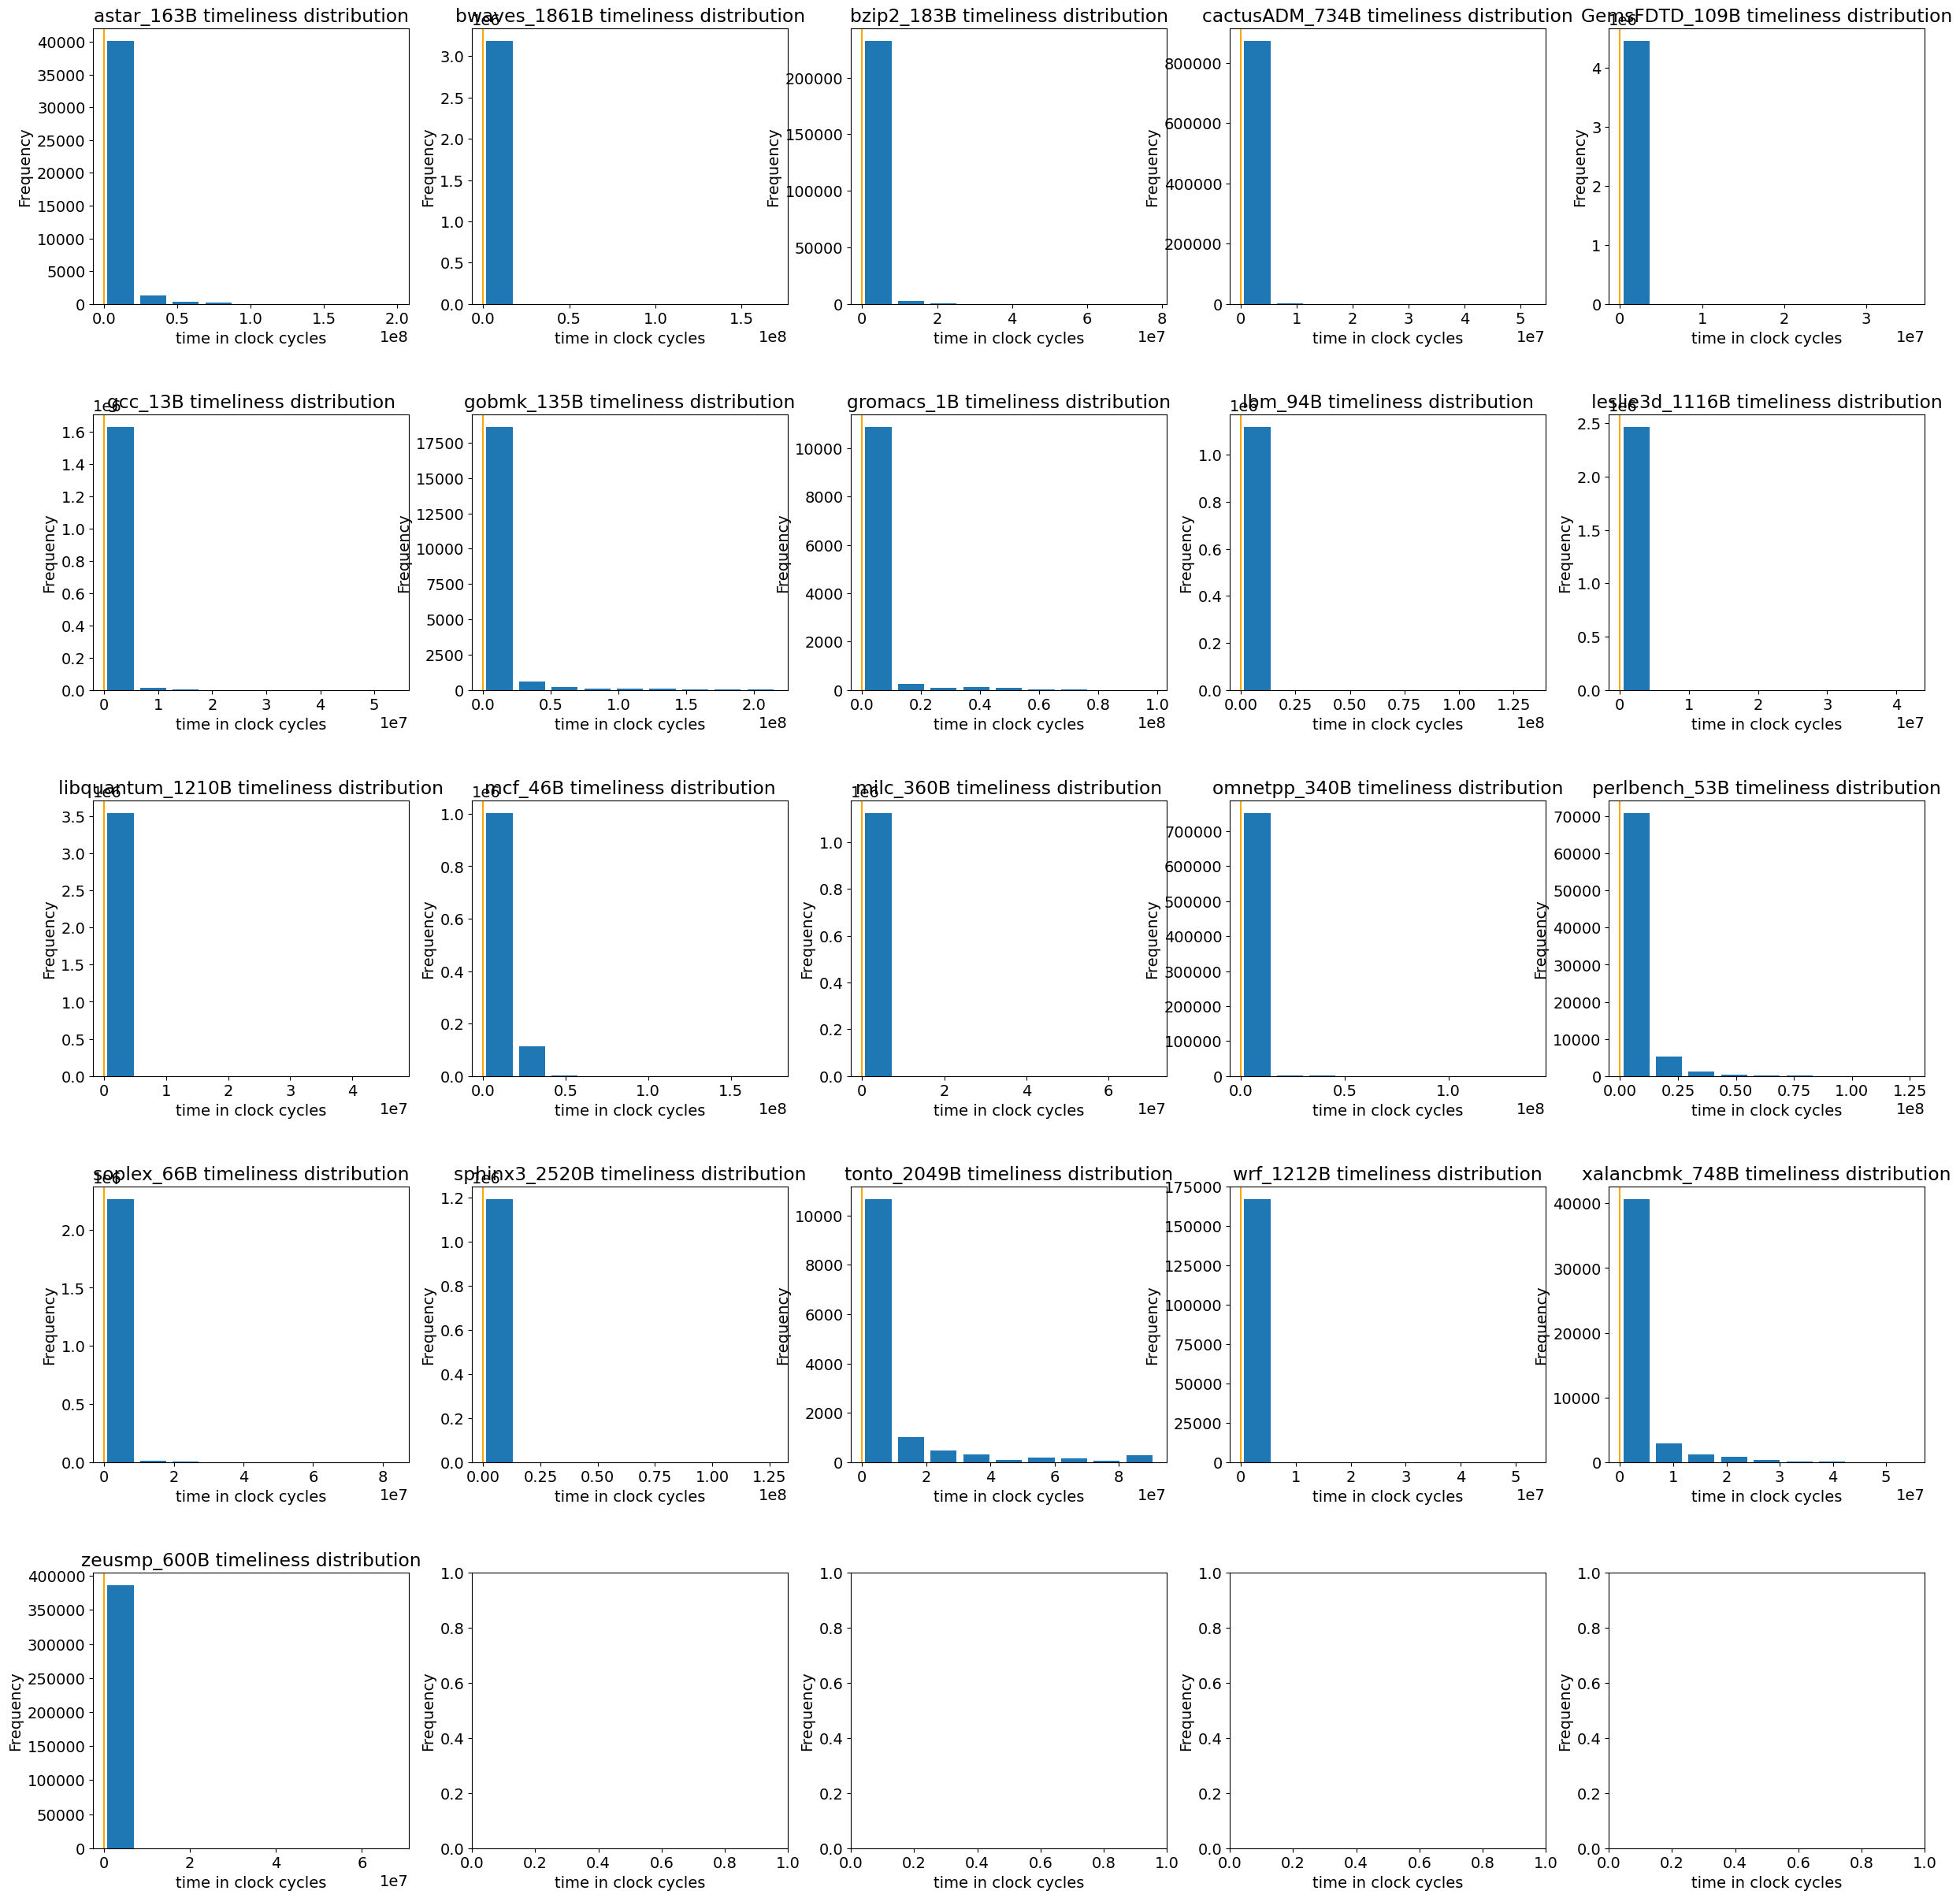

In [10]:
graph_time_distr(experiment_trace_files, traces)
plt.show()

In [ ]:
# Harmony with Best Offset Prefetch Interval Use
# get experiment trace files
experiment = 'experiment_tracer_hawkeye_final_dyn_isb_timeliness'
trace_list = open('../sim_list/traces.txt', 'r')

(experiment_trace_files, traces) = get_experiment_traces(experiment, trace_list)

In [ ]:
graph_time_distr(experiment_trace_files, traces)
plt.show()